# Keras로 Linear&Logistic Regression 맛보기!
---
#### 실습목표
1. keras의 모델링 아이디어를 이해한다.
2. 모든 코드를 이해한다.

## Quick Linear Regression!

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

In [2]:
x = np.array(range(20))
y = x * 2 - 1 

# 20개의 x와 20개의 y를 이용하여 
print(x)
print(y)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[-1  1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37]


In [3]:
# 1번 청소(세션 클리어) : 이미 만들어진 모델이 있다면 그 모델을 없애줘, 메모리에서 날려줘
keras.backend.clear_session()

# 2번 모델 선언(발판 생성)
model = keras.models.Sequential()

# 3번 모델 블록 조립
model.add( keras.layers.Input(shape=(1,)) )
model.add( keras.layers.Dense(1) )

## 오리지널 Sequential API
# model.add( keras.layers.Dense(1, input_shape=(1,)) )

# 4번 컴파일 
model.compile(loss='mse',
              optimizer='adam')
# loss 근본적으로 배우고 있는 것 머신러닝, 딥러닝이 어떤 방습의 학습이죠? 지도학습이죠. 지도학습은 정답에 대한 길을 가르쳐 주는 것이에요
# 내 모델이 만들어내는 예측값과 실제 정답을 비교를 해야겠죠. 정답 길에 대해서 가르쳐줘야겠죠? 그래서 로스라는 친구가 필요하고 내가 만든 예측값과 실제 정답을 무엇으로 비교할래 이걸 의미합니다.
# 이장래 강사님과 평가 지표를 다룰 때 뭘 많이 다루셨죠 MAE, R2, RMSE 등등 텐서플로우 케라스 에서는 mean sqaured error를 많이 씁니다.
# 실제값과 예측값을 mse로 비교하는 거지
# 경사하강법이란 표현을 많이 쓰죠 그 방식으로 로스를 줄여나갈 것인데 얼마나 예쁜 방식으로 나갈지 그걸 정하는 것임 adam이란 친구를 아묻따 쓸것임 
# 옵티마이저에 대해서 말씀드릴 시간이 있다면 말씀드릴게요 
# 사이킷런에서 모델 불러왔어. 그 다음에 뭘 했죠? 학습, 훈련을 했지. 어쨌건 저쨌건 우리 모델한테 학습시켜야지


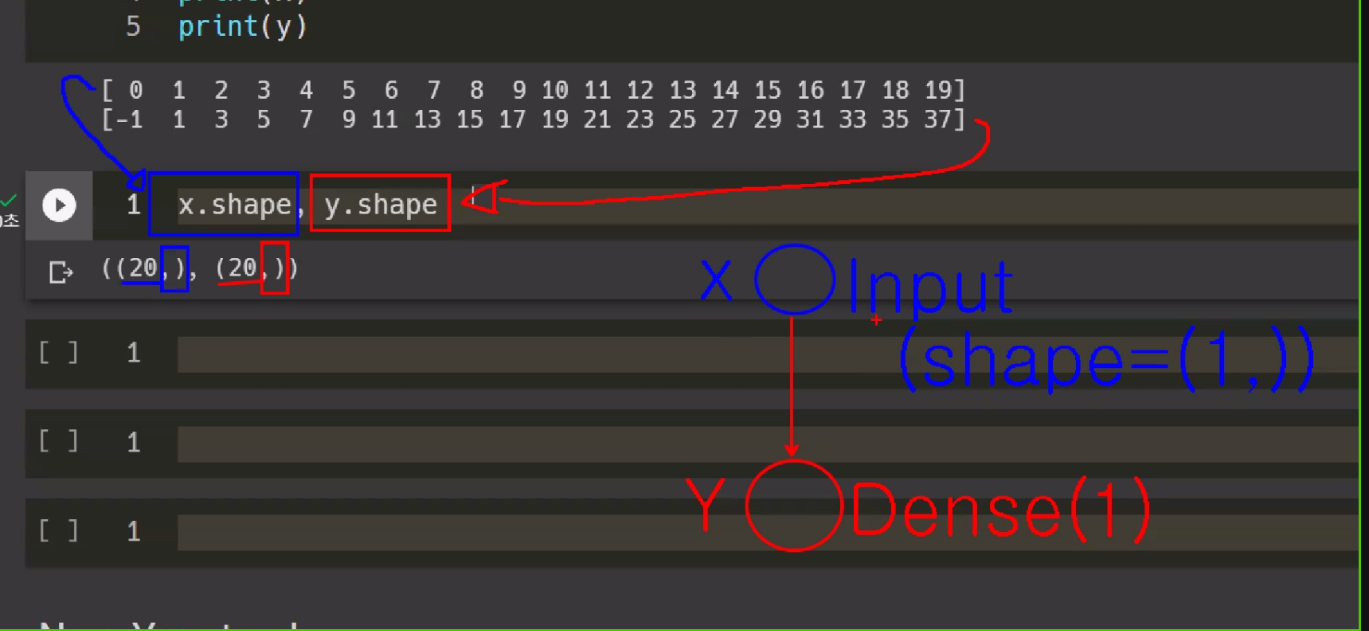

In [4]:
model.fit(x, y, epochs=10, verbose=1)
# 벌보즈는 전체 학습 과정을 상제하게 보여줌 0,1,2를 많이 쓰는데 1이 디폴트임 

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 264.4215
Epoch 2/10
1/1 [==============================] - 0s 7ms/step - loss: 264.0331
Epoch 3/10
1/1 [==============================] - 0s 13ms/step - loss: 263.6451
Epoch 4/10
1/1 [==============================] - 0s 28ms/step - loss: 263.2574
Epoch 5/10
1/1 [==============================] - 0s 14ms/step - loss: 262.8699
Epoch 6/10
1/1 [==============================] - 0s 15ms/step - loss: 262.4828
Epoch 7/10
1/1 [==============================] - 0s 17ms/step - loss: 262.0959
Epoch 8/10
1/1 [==============================] - 0s 17ms/step - loss: 261.7095
Epoch 9/10
1/1 [==============================] - 0s 10ms/step - loss: 261.3233
Epoch 10/10
1/1 [==============================] - 0s 25ms/step - loss: 260.9374


In [5]:
y_pred = model.predict(x)

1/1 [==============================] - 0s 191ms/step


In [6]:
y_pred.reshape(-1)

array([0.00999749, 0.48057935, 0.9511612 , 1.421743  , 1.8923249 ,
       2.362907  , 2.8334887 , 3.3040707 , 3.7746525 , 4.245234  ,
       4.715816  , 5.186398  , 5.6569796 , 6.1275616 , 6.5981436 ,
       7.068725  , 7.539307  , 8.00989   , 8.480471  , 8.951053  ],
      dtype=float32)

In [7]:
y

array([-1,  1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31,
       33, 35, 37])

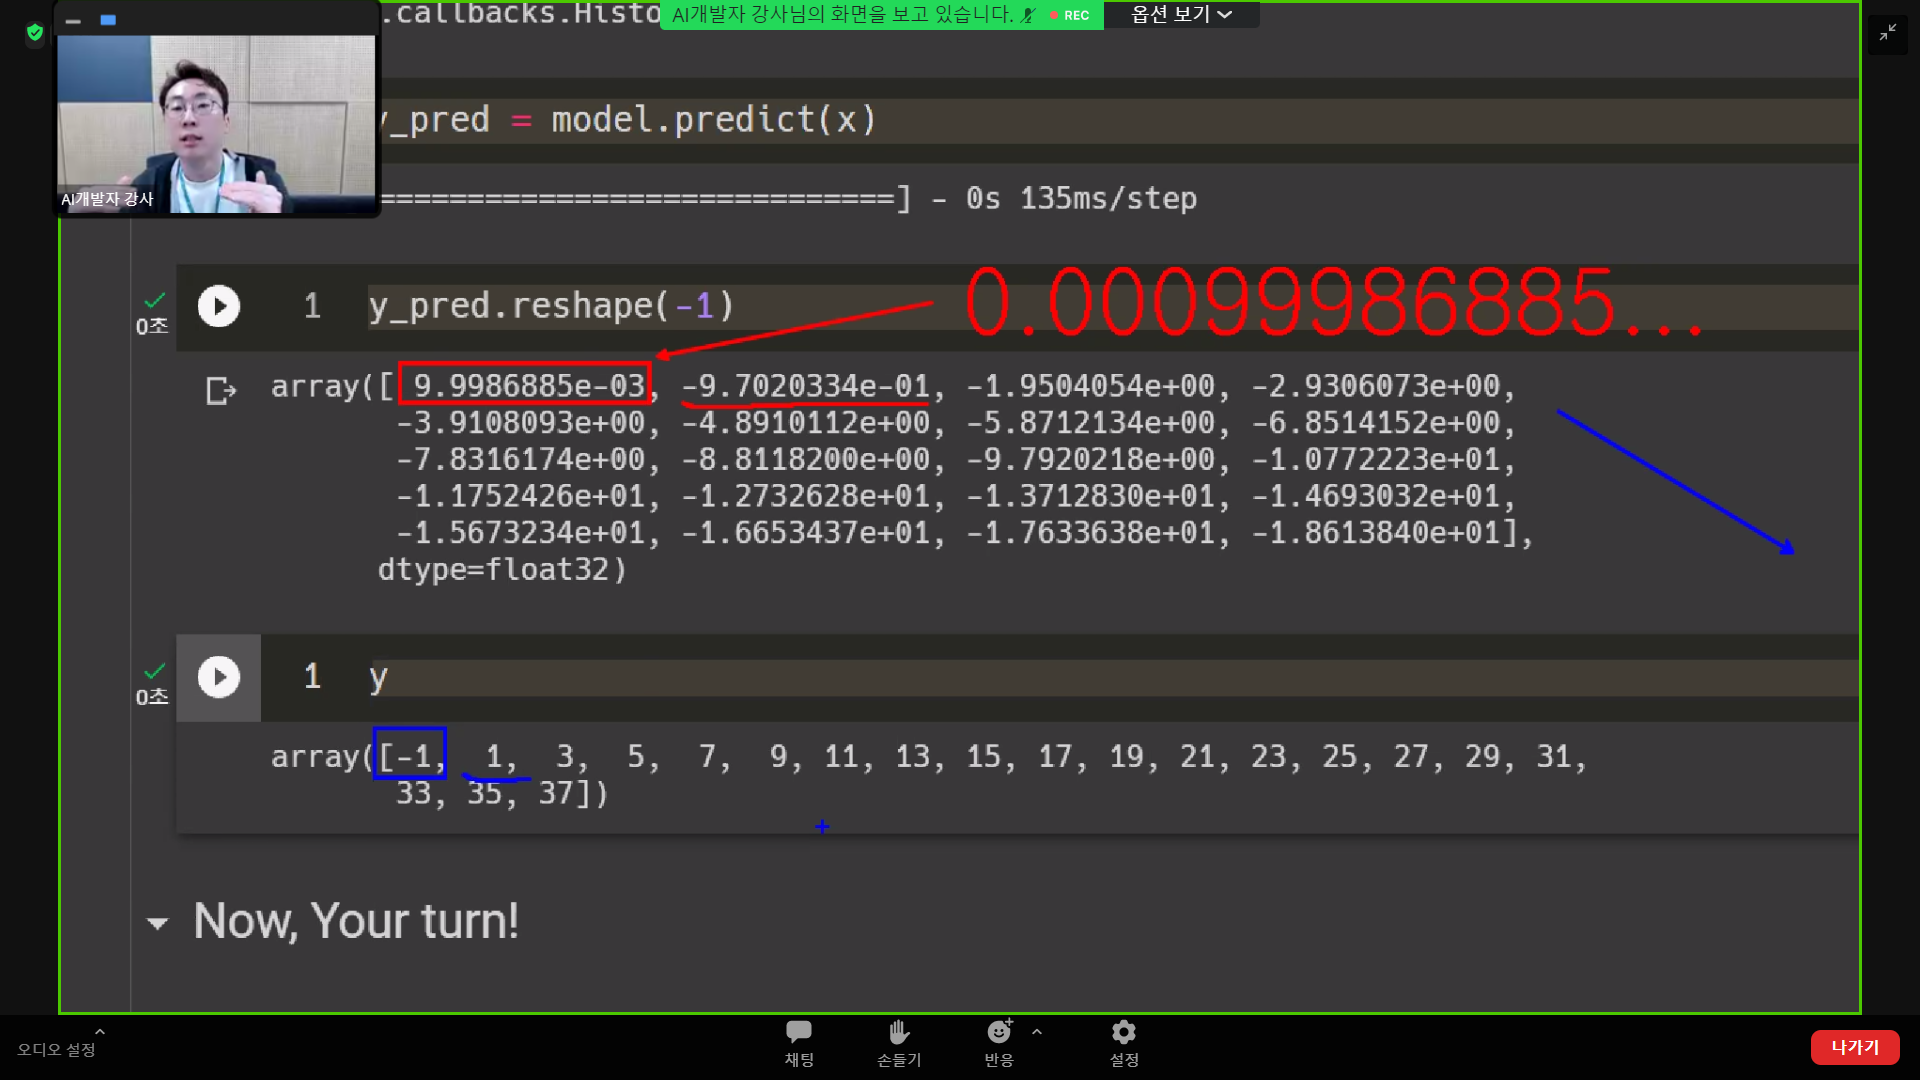
- 우리 모델은 값이 점점 아래로 떨어지는데 실제값은 점점 증가한다. 
- 우리 모델 성능이 쓰레기다..

In [9]:
model.predict(x).reshape(-1)

1/1 [==============================] - 0s 31ms/step


array([0.00999749, 0.48057935, 0.9511612 , 1.421743  , 1.8923249 ,
       2.362907  , 2.8334887 , 3.3040707 , 3.7746525 , 4.245234  ,
       4.715816  , 5.186398  , 5.6569796 , 6.1275616 , 6.5981436 ,
       7.068725  , 7.539307  , 8.00989   , 8.480471  , 8.951053  ],
      dtype=float32)

## Now, Your turn!

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

In [11]:
x = np.array(range(20)) 
y = x * (-3) + 10

print(x)
print(y)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 10   7   4   1  -2  -5  -8 -11 -14 -17 -20 -23 -26 -29 -32 -35 -38 -41
 -44 -47]


In [21]:
x.shape, y.shape

((20,), (20,))

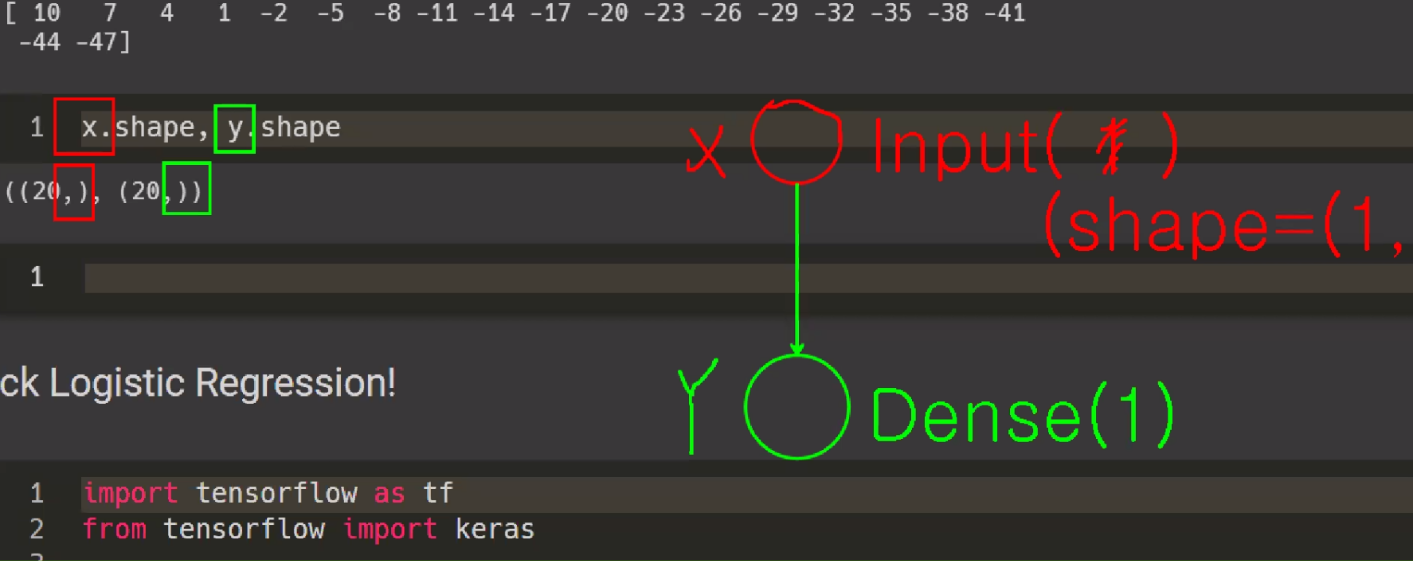

In [14]:
## 모델링 : Sequential API
# 1번 세션 클리어 : 이미 만들어진 모델이 있다면 그 모델을 없애 줘.
keras.backend.clear_session()

# 2번 모델 선언
model = keras.models.Sequential()

# 3번 모델 블록 조립 (모델 블록이란 레이어를 의미함)
model.add( keras.layers.Input(shape=(1,)) )
model.add( keras.layers.Dense(1) )
# 4번 컴파일
model.compile(loss='mse', optimizer='adam')
# 에러를 mse로 따질게, 아묻따 아담으로 볼거야


In [15]:
model.fit(x, y, epochs=10, verbose=1)
# 내가 가지고 있는 학습 데이터를 총 몇 번이나 학습시킬래 >> 에폭스
# 그러니까 x 데이터 전체를 한 번 훑었다면 애톡스 한번임. 그걸 10번 하겠다는 뜻
# 벌보즈 1이 디폴트값이었는데 프로그래스바가 들어감. 
# 앞으로 모델링을 크게 하거나 깊이 쌓거나, 좀 커지면 프로그레스 바가 촘촘해지는 게 보임... 그래서 1로 쓰는 걸 권장함
# 프로그래스바가 없어지면서 옮겨진 것이고 여러분과 저의 로스는 당연히 차이가 날 수 있어요.

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 891.2809
Epoch 2/10
1/1 [==============================] - 0s 16ms/step - loss: 890.5826
Epoch 3/10
1/1 [==============================] - 0s 15ms/step - loss: 889.8848
Epoch 4/10
1/1 [==============================] - 0s 12ms/step - loss: 889.1871
Epoch 5/10
1/1 [==============================] - 0s 23ms/step - loss: 888.4899
Epoch 6/10
1/1 [==============================] - 0s 15ms/step - loss: 887.7928
Epoch 7/10
1/1 [==============================] - 0s 19ms/step - loss: 887.0962
Epoch 8/10
1/1 [==============================] - 0s 26ms/step - loss: 886.3998
Epoch 9/10
1/1 [==============================] - 0s 16ms/step - loss: 885.7037
Epoch 10/10
1/1 [==============================] - 0s 11ms/step - loss: 885.0081


In [16]:
y_pred = model.predict(x)
# 예측값 생성한 것을 와이프레드에 넣어줄 것 

1/1 [==============================] - 0s 85ms/step


In [17]:
y_pred.reshape(-1)
# 애폭스의 값을 늘릴수록 오차는 줄어들 것인데.. 시간의 제한이 있으니까 나중에 해보라고 말할게요 다시

array([-0.00999848,  0.3947671 ,  0.79953265,  1.2042983 ,  1.6090639 ,
        2.0138292 ,  2.4185948 ,  2.8233604 ,  3.228126  ,  3.6328917 ,
        4.0376573 ,  4.442423  ,  4.8471885 ,  5.251954  ,  5.6567197 ,
        6.0614853 ,  6.466251  ,  6.8710165 ,  7.275782  ,  7.6805477 ],
      dtype=float32)

In [18]:
y

array([ 10,   7,   4,   1,  -2,  -5,  -8, -11, -14, -17, -20, -23, -26,
       -29, -32, -35, -38, -41, -44, -47])

In [19]:
model.predict(x).reshape(-1)
# 로스는 좀 크다고 생각하지만 선형회귀 모델링을 한거야 
# 라이브러리 불러오고 모델 만들고 예측값 뽑아내고 연결주의 관점에서 코드로 어떻게 연결하는지 보여드렸다.
# 

1/1 [==============================] - 0s 128ms/step


array([-0.00999848,  0.3947671 ,  0.79953265,  1.2042983 ,  1.6090639 ,
        2.0138292 ,  2.4185948 ,  2.8233604 ,  3.228126  ,  3.6328917 ,
        4.0376573 ,  4.442423  ,  4.8471885 ,  5.251954  ,  5.6567197 ,
        6.0614853 ,  6.466251  ,  6.8710165 ,  7.275782  ,  7.6805477 ],
      dtype=float32)

## Quick Logistic Regression!

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

In [22]:
x = np.array(range(20)) 
y = np.array([0]*10 + [1]*10)

# x자체는 변함이 없는데 y는 0이 10개, 1이 10개인 값을 가짐
print(x)
print(y)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


In [23]:
# 콤마 뒤에 숫자가 없지만 1이 있다고 생각을 해 주면 됨. 2부터는 표현이 됨
# ((20, 1), (20, 1)) 1차원 벡터로 펴준거라 20행으로 출력되고 2행부터는 2,20으로 표현됨
x.shape, y.shape

((20,), (20,))

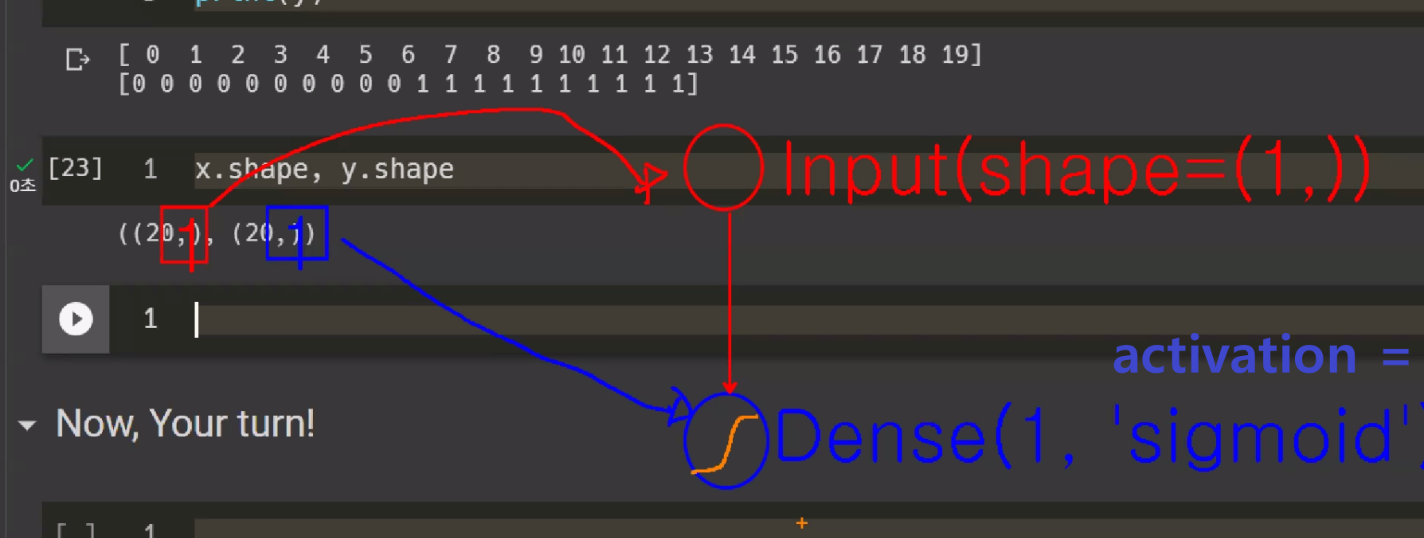

In [24]:
## 모델링 : Sequential API
# 1. 세션 클리어 : 혹시 이미 그려둔 그래프가 있다면 날려줘!
keras.backend.clear_session()

# 2. 레이어 발판 생성(선언) : model에 순차적으로 레이어를 쌓아가겠다는 의도!
model = keras.models.Sequential()

# 3. 레이어 블록 조립 : model에 인풋 값을 받는 레이어를 넣음
model.add( keras.layers.Input(shape=(1,)) )
# model에 Dense 레이어를 넣을거야 (최초의 레이어) : weight를 곱하고, bias를 더해주는 과정
model.add( keras.layers.Dense(1, activation='sigmoid') )


# 오리지널 Sequential API
# model.add( keras.layers.Dense(1, input_shape=(1,), activation='sigmoid') )

# 컴파일 해주렴
model.compile(loss='binary_crossentropy', metrics=['accuracy'],
              optimizer='adam') 
# accuracy라는 보조 지표를 사용하면 정확도가 올라가겠죠? 
# 연결주의 알고리즘의 학습방식은 학습할 데이터에게 계속해서 반복하여 학습시켜 적절한 가중치를 찾습니다. 로스가 내려가는 방향으로 실제로 로스를 올바르게 설정하고 모델도 올바르게 했다면 학습횟수를 늘림으로 인해서 자동으로 알아서 잘 찾아갈 수 있게 해 주는 것이 딥러닝이다.
# 컴파일에서 기본 알고리즘은 경사하강법이다. 이 옵티마이저는 경사하강법을 얼마나 예쁘게 하는지 다루는 것


In [25]:
# 데이터를 넣어서 학습시키자!
model.fit(x, y, epochs=10, verbose=1)
# 내가 가지고 있는 x를 몇 번이나 학습시킬래 에폭스, 
# 손실함수 어쨌든 로스는 낮을수록 좋아요. 
# 어큐라시는 사람이 찍는 것보다 조금은 좋게 나오네요..


# 결과 출력해줘!
print(y)
print(model.predict(x))

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 1.6098 - accuracy: 0.5500
Epoch 2/10
1/1 [==============================] - 0s 33ms/step - loss: 1.6072 - accuracy: 0.5500
Epoch 3/10
1/1 [==============================] - 0s 11ms/step - loss: 1.6046 - accuracy: 0.5500
Epoch 4/10
1/1 [==============================] - 0s 11ms/step - loss: 1.6020 - accuracy: 0.5500
Epoch 5/10
1/1 [==============================] - 0s 12ms/step - loss: 1.5994 - accuracy: 0.5500
Epoch 6/10
1/1 [==============================] - 0s 13ms/step - loss: 1.5968 - accuracy: 0.5500
Epoch 7/10
1/1 [==============================] - 0s 17ms/step - loss: 1.5942 - accuracy: 0.5500
Epoch 8/10
1/1 [==============================] - 0s 11ms/step - loss: 1.5916 - accuracy: 0.5500
Epoch 9/10
1/1 [==============================] - 0s 11ms/step - loss: 1.5890 - accuracy: 0.5500
Epoch 10/10
1/1 [==============================] - 0s 9ms/step - loss: 1.5864 - accuracy: 0.5500
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1

In [26]:
# 예측값 
y_pred = model.predict(x)

1/1 [==============================] - 0s 48ms/step


In [28]:
y_pred[:5]


array([[0.49750024],
       [0.65931755],
       [0.7909247 ],
       [0.8808771 ],
       [0.9352945 ]], dtype=float32)

In [29]:
y[:5]

array([0, 0, 0, 0, 0])

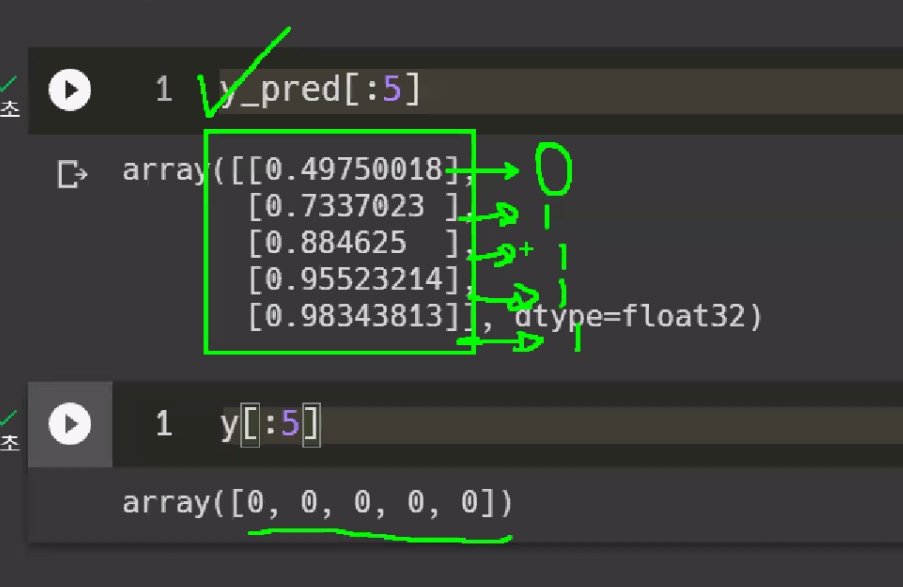

## Now, Your turn!

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

In [35]:
x = np.array(range(40)) 
y = np.array([0]*20 + [1]*20)
print(x)
print(y)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


In [36]:
x.shape, y.shape

((40,), (40,))

In [37]:
# 모델링 : Sequential API
# 1. 세션 클리어
keras.backend.clear_session()

# 2. 레이어 선언
model = keras.models.Sequential()

# 3. 레이어 블록 조립
model.add( keras.layers.Input(shape=(1,)))
model.add( keras.layers.Dense(1, activation='sigmoid'))

# 4. 컴파일
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
# 컴퓨터에게 알려줘야해 아묻따 경사하강법을 얼마나 예쁘게 해줄래 옵티마이저 >> 아담으로 해라
# 직관적이지가 않아서 보조지표로 메트릭스 accuracy라는 것을 쓰기로 했음


In [38]:
model.fit(x, y, epochs=10, verbose=2)

print(y)
print(model.predict(x))

Epoch 1/10
2/2 - 2s - loss: 1.6658 - accuracy: 0.5000 - 2s/epoch - 926ms/step
Epoch 2/10
2/2 - 0s - loss: 1.6413 - accuracy: 0.4750 - 9ms/epoch - 4ms/step
Epoch 3/10
2/2 - 0s - loss: 1.6166 - accuracy: 0.4750 - 7ms/epoch - 3ms/step
Epoch 4/10
2/2 - 0s - loss: 1.5929 - accuracy: 0.4750 - 8ms/epoch - 4ms/step
Epoch 5/10
2/2 - 0s - loss: 1.5695 - accuracy: 0.4750 - 7ms/epoch - 3ms/step
Epoch 6/10
2/2 - 0s - loss: 1.5454 - accuracy: 0.4750 - 11ms/epoch - 5ms/step
Epoch 7/10
2/2 - 0s - loss: 1.5206 - accuracy: 0.4750 - 10ms/epoch - 5ms/step
Epoch 8/10
2/2 - 0s - loss: 1.4976 - accuracy: 0.4750 - 16ms/epoch - 8ms/step
Epoch 9/10
2/2 - 0s - loss: 1.4727 - accuracy: 0.4750 - 13ms/epoch - 6ms/step
Epoch 10/10
2/2 - 0s - loss: 1.4492 - accuracy: 0.4750 - 13ms/epoch - 7ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
2/2 [==============================] - 0s 13ms/step
[[0.5041688 ]
 [0.4841948 ]
 [0.4642712 ]
 [0.444461  ]
 [0.42482576]
 [0.40542495]
 [0.

- 0으로 하면?
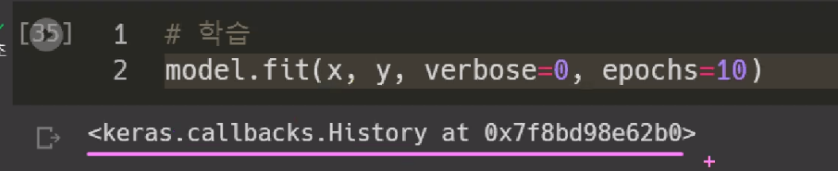

In [39]:
y_pred = model.predict(x)

2/2 [==============================] - 0s 4ms/step


In [40]:
y_pred[:5]

array([[0.5041688 ],
       [0.4841948 ],
       [0.4642712 ],
       [0.444461  ],
       [0.42482576]], dtype=float32)

In [41]:
y[:5]

array([0, 0, 0, 0, 0])